In [25]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
words = open('names.txt','r').read().splitlines()

In [3]:
words[3:10]


['ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia', 'harper']

In [4]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs,chs[1:]):
        bigram = (ch1,ch2)
        b[bigram] = b.get(bigram,0) + 1

In [5]:
sorted(b.items(), key = lambda kv: - kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [6]:
N = torch.zeros(27,27,dtype = torch.int32)

In [7]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.']=0
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1,ix2] +=1

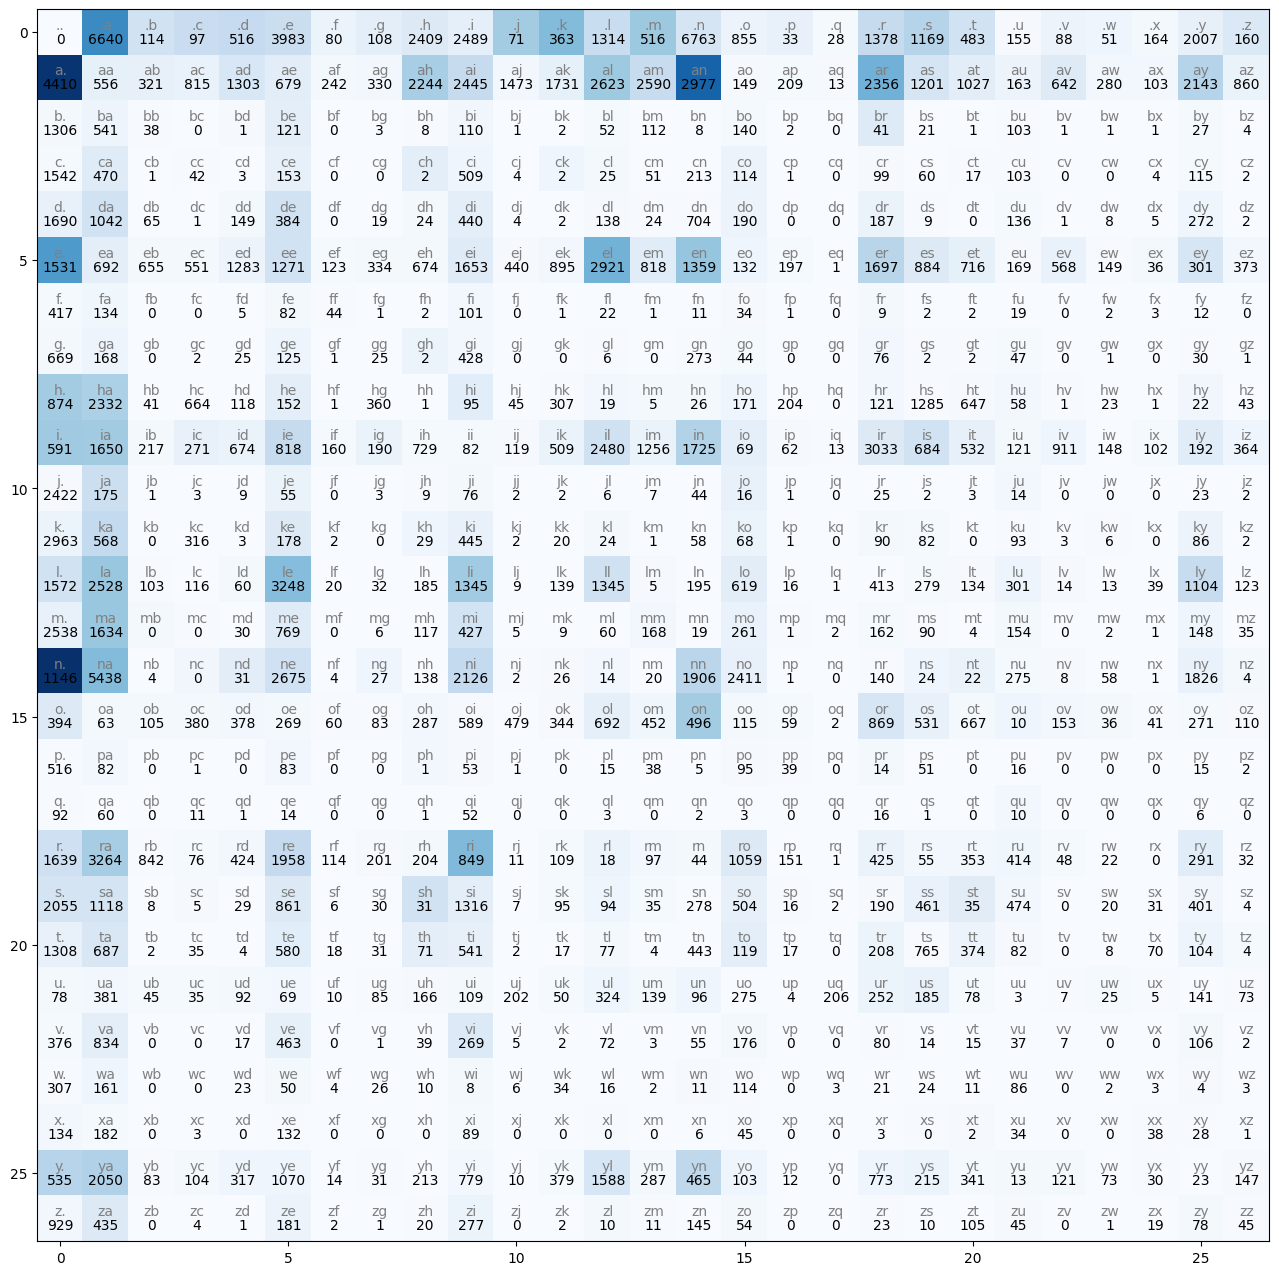

In [8]:

itos = {i : s for s,i in stoi.items()}
plt.figure(figsize=(16,16))
plt.imshow(N,cmap="Blues")
for i in range(27):
    for j in range (27):
        chstr = itos[i] + itos[j]
        plt.text(j,i,chstr,ha="center",va="bottom",color="grey")
        plt.text(j,i,N[j,i].item(), ha="center",va="top")

In [9]:
p = N[0].float()
p = p/ p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [10]:
P = (N+1).float()
P /= P.sum(1,keepdim=True)

In [11]:
g = torch.Generator().manual_seed(694202137)
outs = []
for i in range(10):
    ix = 0
    while True:
        p = P[ix]
        ix = torch.multinomial(p,num_samples = 1, replacement=True, generator=g).item()
        outs.append(itos[ix])
        if ix==0:
            break;
    

print(''.join(outs))

jouilmasmianah.maivetamerehvero.kamiobyan.kaimi.a.ya.codaviahext.ler.ccochtreyaiveyrinit.nannelyackal.


In [12]:
log_likelihood = 0.0
n=0
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1,ix2]
        log_prob = torch.log(prob)
        log_likelihood += log_prob
        n+=1
       # print(f'{ch1}{ch2} {prob:.4f} {log_prob=:.4f}')
nll = -log_likelihood
print(f'{nll/n}')

2.45442533493042


In [30]:
xs, ys = [],[]
for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1,ch2)
        
        xs.append(ix1)
        ys.append(ix2)

print(xs)
print(ys)
xs = torch.tensor(xs)
ys = torch.tensor(ys)

. p
p i
i o
o t
t r
r .
[0, 16, 9, 15, 20, 18]
[16, 9, 15, 20, 18, 0]


In [45]:
xenc = F.one_hot(xs,num_classes=27).float()
W = torch.randn((27,27))

In [48]:
logits = xenc @ W
counts = logits.exp()
probs = counts / counts.sum(1,keepdims = True)


tensor(1.)

In [49]:
nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .p (indexes 0,16)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0276, 0.0019, 0.0132, 0.0333, 0.0596, 0.0128, 0.0216, 0.0346, 0.0326,
        0.0142, 0.0136, 0.0066, 0.0297, 0.0956, 0.0124, 0.0321, 0.0179, 0.0456,
        0.0547, 0.0106, 0.3081, 0.0078, 0.0055, 0.0315, 0.0093, 0.0348, 0.0328])
label (actual next character): 16
probability assigned by the net to the the correct character: 0.017876561731100082
log likelihood: -4.024264812469482
negative log likelihood: 4.024264812469482
--------
bigram example 2: pi (indexes 16,9)
input to the neural net: 16
output probabilities from the neural net: tensor([0.0131, 0.0108, 0.0372, 0.0137, 0.0110, 0.1005, 0.0129, 0.0099, 0.0151,
        0.0160, 0.0088, 0.0138, 0.0197, 0.0391, 0.1331, 0.2253, 0.0525, 0.0549,
        0.0507, 0.0119, 0.0277, 0.0212, 0.0330, 0.0244, 0.0186, 0.0208, 0.0043])
label (actual next character): 9
probability assigned by the net to the the correct character:

In [51]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(6), ys].log().mean()

In [52]:
W.grad = None
loss.backward()

In [54]:
W.grad.shape

torch.Size([27, 27])